In [18]:
# Import
import os, glob, joblib
import numpy as np
import requests as req
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [19]:
# Set Google Drive Path
drive.mount('/content/gdrive')
path_readdata = '/content/gdrive/My Drive/competition/RunSpace/model/'
os.chdir(path_readdata)

path_outputfig = path_readdata + 'output_figure'
if  not os.path.exists(path_outputfig):
  os.mkdir(path_outputfig)

path_outputmdl = path_readdata + 'output_model'
if  not os.path.exists(path_outputmdl):
  os.mkdir(path_outputmdl)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [20]:
# Load GNSS Training Data
foldername = 'segment-interval-01-training'
textfiles = glob.glob(os.path.join(foldername, "*.txt"))

data_training = np.array([])
for filename in textfiles:
  data_training = np.loadtxt(filename)

print(data_training.shape)

(166049, 6)


In [21]:
# Split the Training and Test Data
X = data_training[:, :-2]
Y = data_training[:, -2:]
Xtr, Xts, Ytr, Yts = train_test_split(X, Y, train_size=0.8, random_state=None, stratify=None)
print(Xtr.shape, Ytr.shape, sep=" ")
print(Xtr[1])
print(Ytr[1])

(132839, 4) (132839, 2)
[ 170162.977613 2544295.518403  170162.987585 2544295.533112]
[ 170162.982604 2544295.525752]


In [22]:
# Linear Model
reg = linear_model.LinearRegression()
reg.fit(Xtr, Ytr)

LinearRegression()

In [23]:
# Save Model
model_name = '/GNSS_interpolation_model_dirEN.h5'
joblib.dump(reg, path_outputmdl + model_name)

['/content/gdrive/My Drive/competition/RunSpace/model/output_model/GNSS_interpolation_model_dirEN.h5']

In [24]:
# Load Model
my_model = joblib.load(path_outputmdl + model_name)

In [25]:
# Compare R^2 of Traing and Testing Data
Yhat_tr = my_model.predict(Xtr)
RSS_tr = np.mean((Yhat_tr-Ytr)**2)/(np.std(Ytr)**2)
Rsq_tr = 1 - RSS_tr
print("R^2 = {0:f}".format(Rsq_tr))

Yhat_val = my_model.predict(Xts)
RSS_val = np.mean((Yhat_val-Yts)**2)/(np.std(Yts)**2)
Rsq_val = 1 - RSS_val
print("R^2 = {0:f}".format(Rsq_val))

R^2 = 1.000000
R^2 = 1.000000


In [26]:
# Load GNSS Testing Data
foldername = 'segment-interval-01-testing'
textfiles = glob.glob(os.path.join(foldername, "*.txt"))

data_testing = np.array([])
for filename in textfiles:
  data_testing = np.loadtxt(filename)

print(data_testing.shape)

(3321, 6)


In [27]:
# Check Predicted Result
X = data_testing[:, :-2]
Y = data_testing[:, -2:]
my_test = np.array(X)
my_pred = my_model.predict(my_test)
time = 500

print("real = {:.6f}, {:.6f}".format(Y[time, 0], Y[time, 1]))
print("pred = {:.6f}, {:.6f}".format(my_pred[time, 0], my_pred[time, 1]))
print("diff = {:.6f}, {:.6f}".format((Y-my_pred)[time, 0], (Y-my_pred)[time, 1]))

real = 169719.753147, 2544505.709210
pred = 169719.753461, 2544505.709279
diff = -0.000314, -0.000069


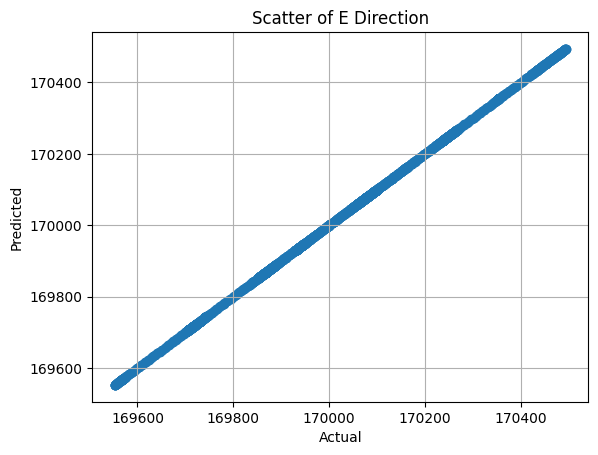

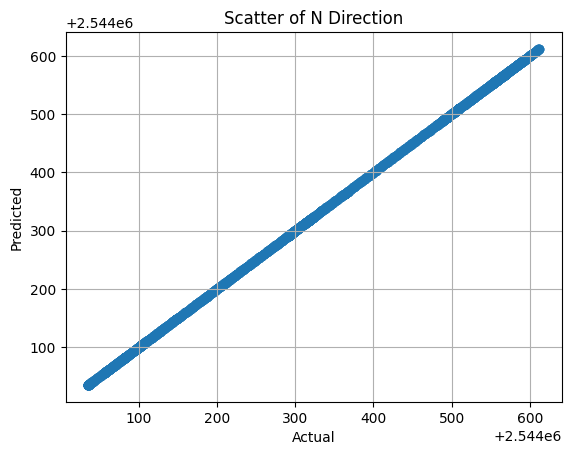

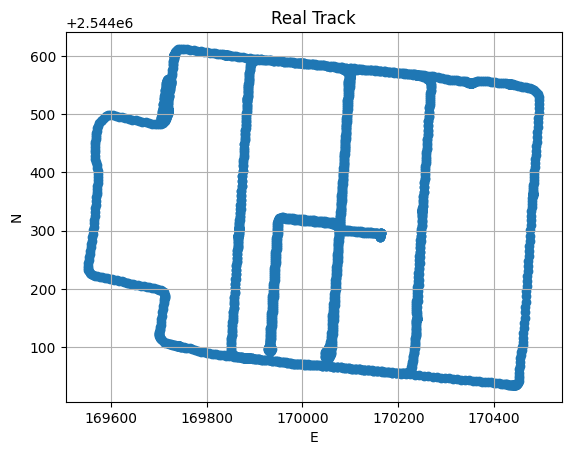

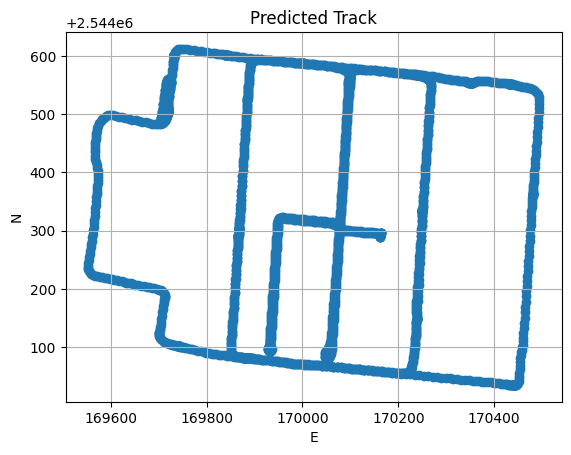

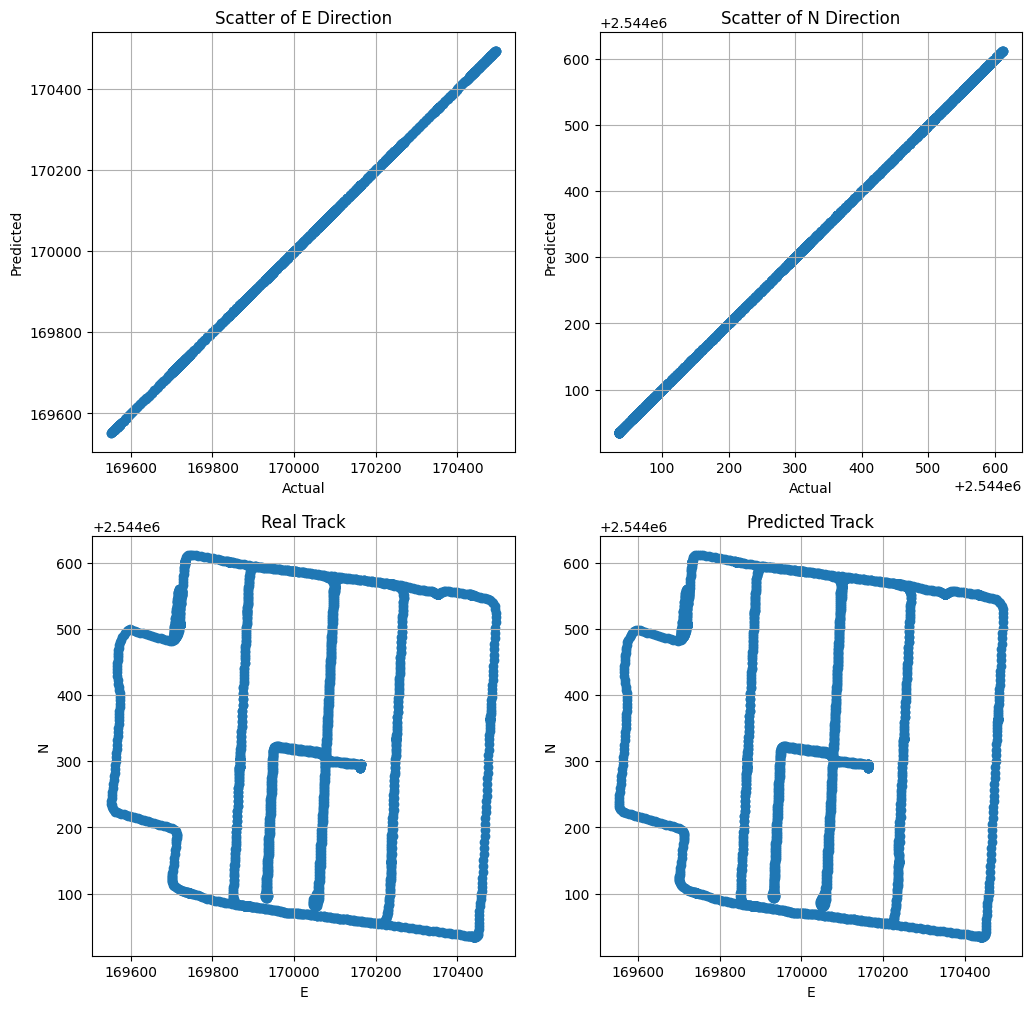

In [32]:
# Make Plot
def make_plot(X_, Y_, title_, xlabel_, ylabel_, pathname_, filename_):
  plt.scatter(X_, Y_)
  plt.title(title_)
  plt.xlabel(xlabel_)
  plt.ylabel(ylabel_)
  plt.grid()

  plt.savefig(pathname_ + filename_)
  plt.show()

make_plot(Y[:, 0], my_pred[:, 0], 'Scatter of E Direction', 'Actual', 'Predicted', path_outputfig, '/figure_E_Direction')
make_plot(Y[:, 1], my_pred[:, 1], 'Scatter of N Direction', 'Actual', 'Predicted', path_outputfig, '/figure_N_Direction')
make_plot(Y[:, 0], Y[:, 1], 'Real Track', 'E', 'N', path_outputfig, '/figure_Real_Track')
make_plot(my_pred[:, 0], my_pred[:, 1], 'Predicted Track', 'E', 'N', path_outputfig, '/figure_Predicted_Track')

fig, ax = plt.subplots(2, 2, figsize=(12, 12))

ax[0, 0].scatter(Y[:, 0], my_pred[:, 0])
ax[0, 0].set_title('Scatter of E Direction')
ax[0, 0].set_xlabel('Actual')
ax[0, 0].set_ylabel('Predicted')
ax[0, 0].grid()

ax[0, 1].scatter(Y[:, 1], my_pred[:, 1])
ax[0, 1].set_title('Scatter of N Direction')
ax[0, 1].set_xlabel('Actual')
ax[0, 1].set_ylabel('Predicted')
ax[0, 1].grid()

ax[1, 0].scatter(Y[:, 0], Y[:, 1])
ax[1, 0].set_title('Real Track')
ax[1, 0].set_xlabel('E')
ax[1, 0].set_ylabel('N')
ax[1, 0].grid()

ax[1, 1].scatter(my_pred[:, 0], my_pred[:, 1])
ax[1, 1].set_title('Predicted Track')
ax[1, 1].set_xlabel('E')
ax[1, 1].set_ylabel('N')
ax[1, 1].grid()

plt.savefig(path_outputfig + '/figure_combine')